**Import Libraries**

In [68]:
#Import Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.impute import SimpleImputer
from yellowbrick.cluster import KElbowVisualizer
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

**Import Dataset**

In [69]:
ev_data_geo = pd.read_csv('Geographic_EV_Dataset.csv')
df = ev_data_geo.copy()

**Exploratory Data Analysis**

In [70]:
df.shape
df.head()
df.dtypes
df.info()
df.isnull().sum()
ev_data_geo.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 8 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Year                             96845 non-null  float64
 1   Month_Name                       96845 non-null  object 
 2   Date                             96845 non-null  object 
 3   State                            96845 non-null  object 
 4   Vehicle_Class                    96845 non-null  object 
 5   Vehicle_Category                 96845 non-null  object 
 6   Vehicle_Type                     96845 non-null  object 
 7   Electric_Vehicle_Sales_Quantity  96846 non-null  float64
dtypes: float64(2), object(6)
memory usage: 64.0+ MB


,Year,Electric_Vehicle_Sales_Quantity
count,96845.000000,9.684600e+04
mean,2018.622768,7.421702e+01
std,2.895581,1.155614e+04
min,2014.000000,0.000000e+00
25%,2016.000000,0.000000e+00
50%,2019.000000,0.000000e+00
75%,2021.000000,0.000000e+00
max,2024.000000,3.593811e+06


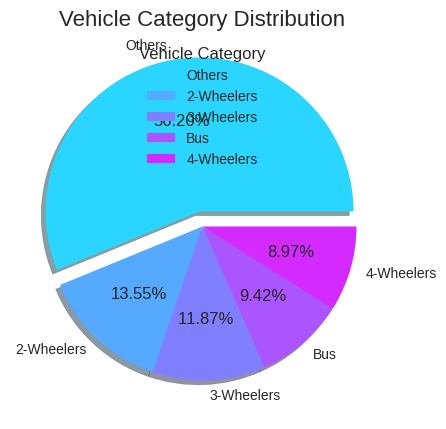

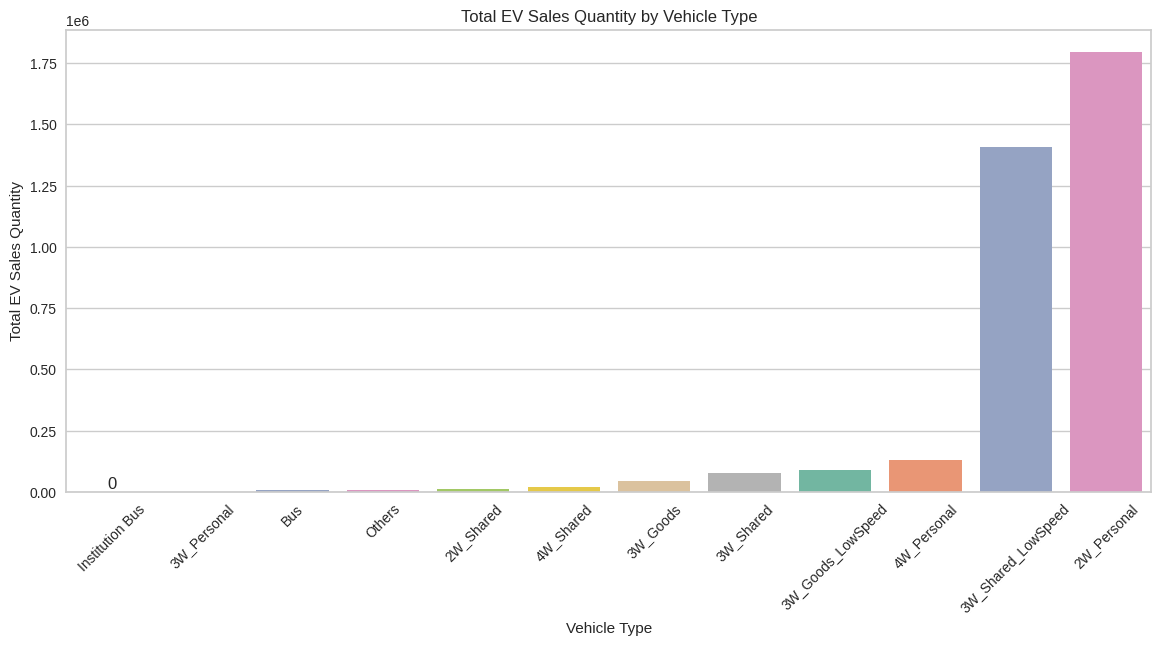

In [71]:

# Pie Chart for Vehicle Category Distribution
labels = ev_data_geo['Vehicle_Category'].value_counts().index.tolist()
size = ev_data_geo['Vehicle_Category'].value_counts().values

# Custom colors for the pie chart
colors = sns.color_palette("cool", len(labels))  # Cool color palette for variety
explode = [0.1 if i == 0 else 0 for i in range(len(labels))]  # Emphasize the first category

plt.rcParams['figure.figsize'] = (5, 5)
plt.pie(size, colors=colors, explode=explode, labels=labels, shadow=True, autopct='%.2f%%')
plt.title('Vehicle Category Distribution', fontsize=16)
plt.axis('off')  # Hide axis
plt.legend(title="Vehicle Category")
plt.show()

# Bar Plot for Total EV Sales by Vehicle Type
plt.rcParams['figure.figsize'] = (14, 6)
custom_palette = sns.color_palette("Set2")  # Set2 color palette for bar plot

# Grouping by 'Vehicle_Type' and summing 'Electric_Vehicle_Sales_Quantity'
type_distribution = ev_data_geo.groupby('Vehicle_Type')['Electric_Vehicle_Sales_Quantity'].sum().round().astype(int).sort_values()

# Plotting the bar chart
bar_plot = sns.barplot(x=type_distribution.index, y=type_distribution.values, palette=custom_palette)
bar_plot.bar_label(bar_plot.containers[0], fmt='%d')  # Format labels as integers

plt.title('Total EV Sales Quantity by Vehicle Type')
plt.xlabel('Vehicle Type')
plt.ylabel('Total EV Sales Quantity')
plt.xticks(rotation=45)
plt.show()


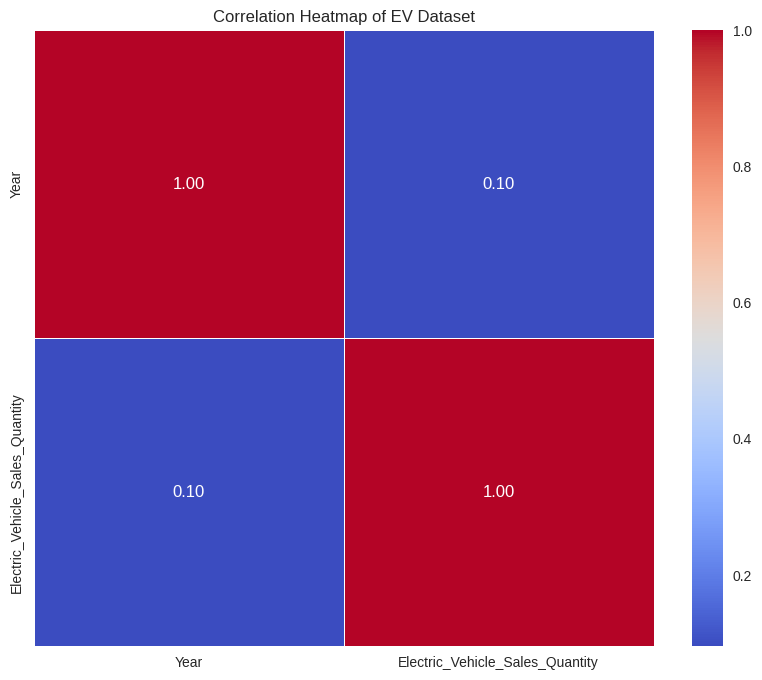

In [72]:
# Select only numerical features for correlation analysis
numeric_data = ev_data_geo.select_dtypes(include=['int64', 'float64'])

# Calculate the correlation matrix
correlation_matrix = numeric_data.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap of EV Dataset')
plt.show()


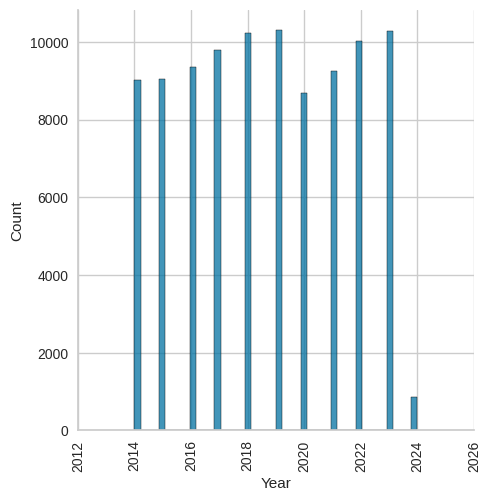

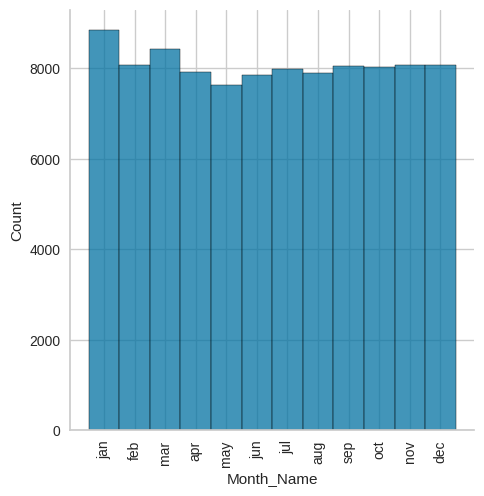

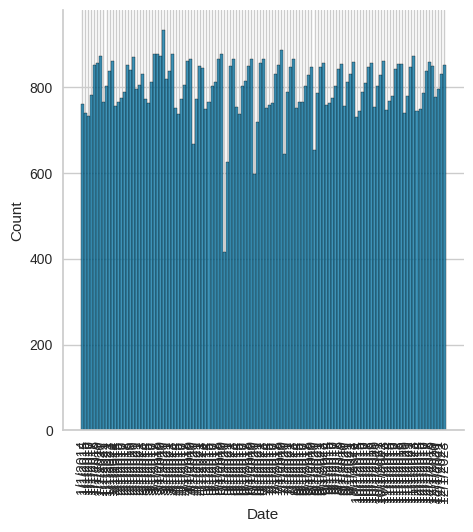

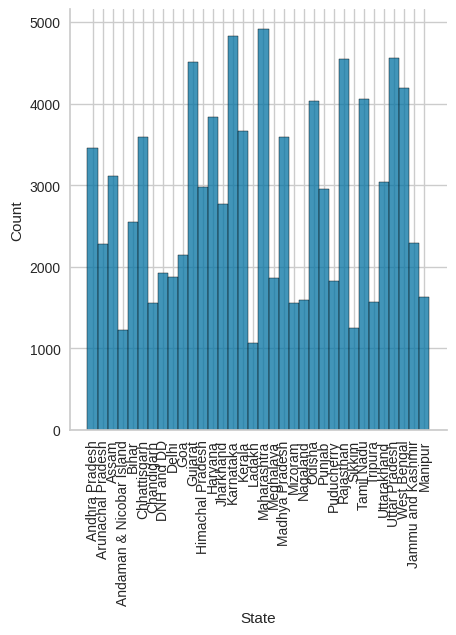

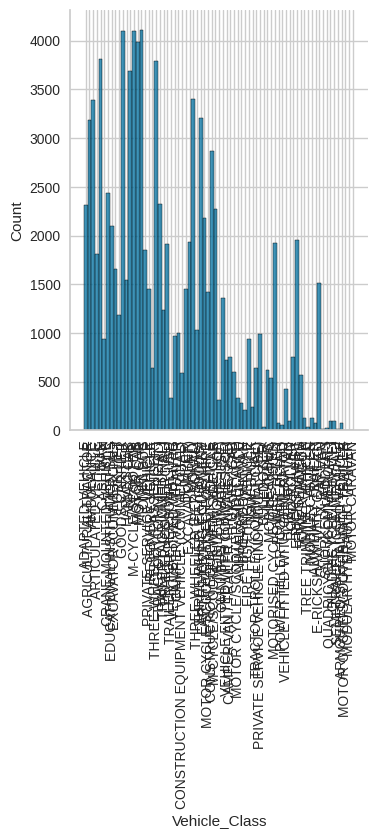

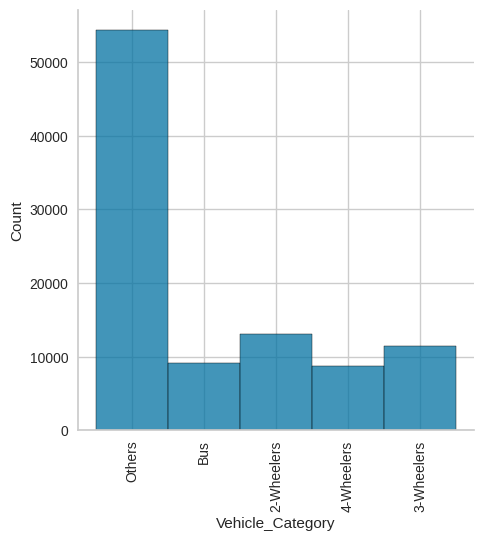

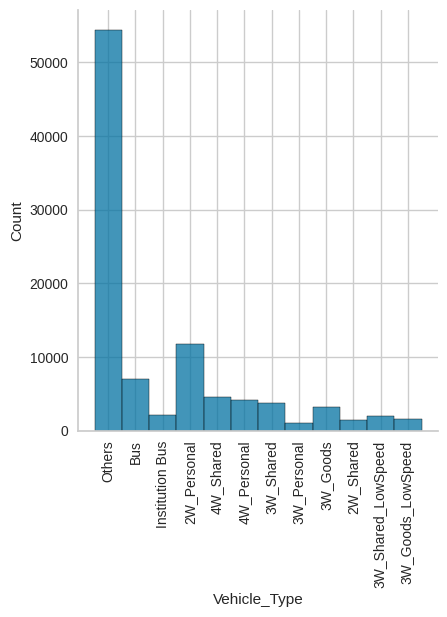

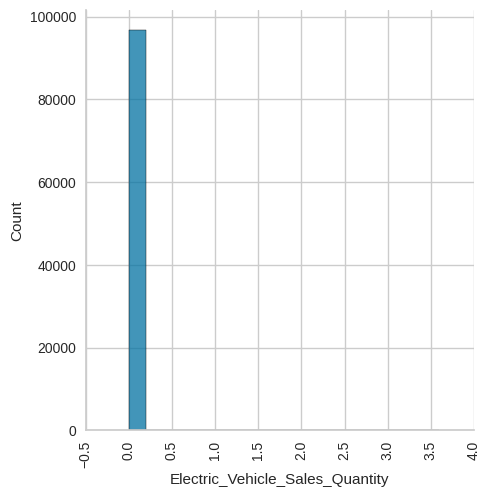

In [73]:
for col in df.columns:
    ax= sns.displot(df[col])
    ax.set_xticklabels(rotation=90)

**Principal component analysis**

Explained Variance Ratio: [0.61728827 0.20000708]
Cumulative Variance Ratio: [0.61728827 0.81729535]


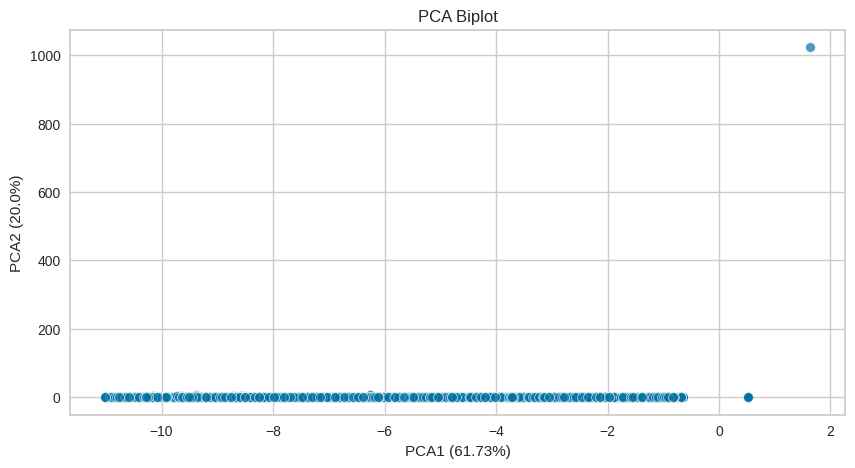

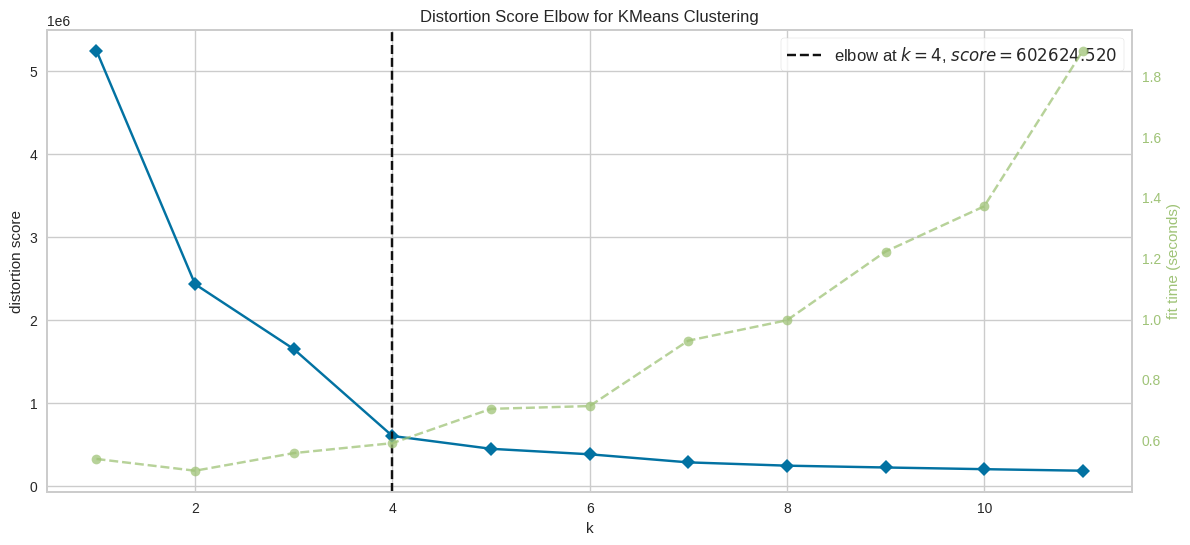

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [74]:
# Define categorical columns that need label encoding
categorical_columns = ['State', 'Vehicle_Class', 'Vehicle_Category', 'Vehicle_Type']
label_encoders = {}

# Label encode each categorical column
for col in categorical_columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le  # Store encoders for possible inverse transform later

# Define features including the encoded categorical columns and the sales quantity
features = df[['State', 'Vehicle_Class', 'Vehicle_Category', 'Vehicle_Type', 'Electric_Vehicle_Sales_Quantity']]

# Handle missing values by imputing the mean for numerical columns
imputer = SimpleImputer(strategy='mean')
features_imputed = imputer.fit_transform(features)

# Standardize the data
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features_imputed)

# Apply PCA
pca = PCA(n_components=2)  # Using 2 components for easier visualization
pca_data = pca.fit_transform(features_scaled)
pca_df = pd.DataFrame(data=pca_data, columns=['PC1', 'PC2',])

# Print explained variance
print("Explained Variance Ratio:", pca.explained_variance_ratio_)
print("Cumulative Variance Ratio:", np.cumsum(pca.explained_variance_ratio_))

# PCA Biplot
plt.figure(figsize=(10, 5))
sns.scatterplot(x='PC1', y='PC2', data=pca_df, alpha=0.7, s=50)
plt.xlabel(f'PCA1 ({round(pca.explained_variance_ratio_[0] * 100, 2)}%)')
plt.ylabel(f'PCA2 ({round(pca.explained_variance_ratio_[1] * 100, 2)}%)')
plt.title('PCA Biplot')
plt.grid(True)
plt.show()

# K-means Clustering with Elbow Method to determine the optimal number of clusters
model = KMeans(random_state=42)
visualizer = KElbowVisualizer(model, k=(1, 12))
visualizer.fit(features_scaled)
visualizer.show()


**K-Means Clustering**

Cluster Labels for States: cluster_num
2    25
0     8
3     1
1     1
Name: count, dtype: int64
Inertia: 90949091021.23499
Iterations: 5


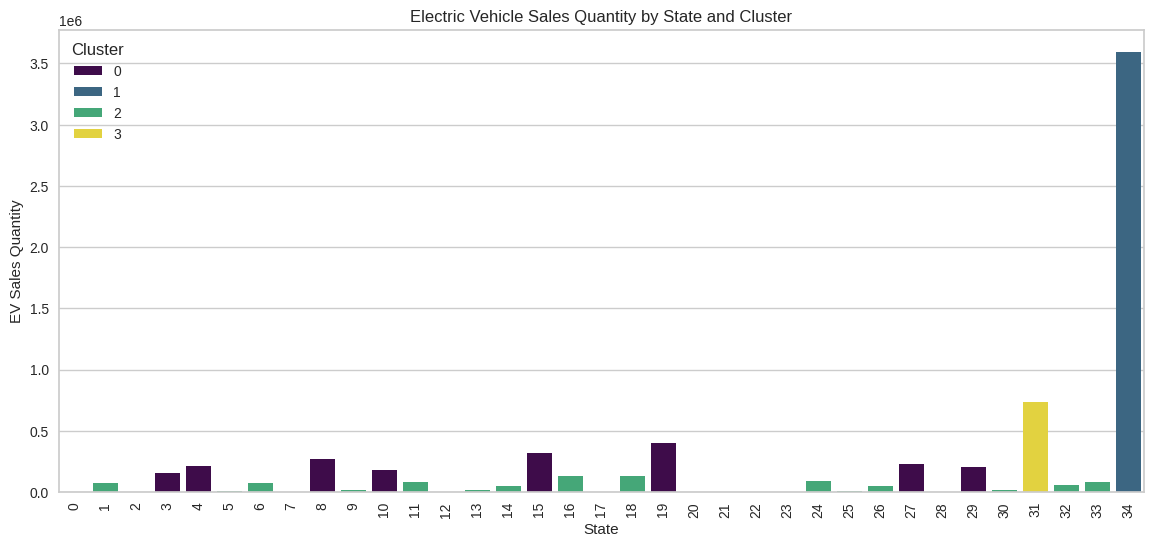

   cluster_num  Electric_Vehicle_Sales_Quantity
0            0                       245392.625
1            1                      3593811.000
2            2                        35943.840
3            3                       732074.000


In [76]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from statsmodels.graphics.mosaicplot import mosaic
from collections import Counter

# Group by 'State' and aggregate 'Electric_Vehicle_Sales_Quantity'
state_sales = df.groupby('State')['Electric_Vehicle_Sales_Quantity'].sum().reset_index()

# Handle missing values in Electric_Vehicle_Sales_Quantity if any
imputer = SimpleImputer(strategy='mean')
state_sales['Electric_Vehicle_Sales_Quantity'] = imputer.fit_transform(state_sales[['Electric_Vehicle_Sales_Quantity']])

# Perform K-means clustering on aggregated EV sales quantity by state
kmeans = KMeans(n_clusters=4, init='k-means++', random_state=0)
state_sales['cluster_num'] = kmeans.fit_predict(state_sales[['Electric_Vehicle_Sales_Quantity']])

# Display cluster assignments
print("Cluster Labels for States:", state_sales['cluster_num'].value_counts())
print("Inertia:", kmeans.inertia_)
print("Iterations:", kmeans.n_iter_)

# Plot the clustered states by sales quantity
plt.figure(figsize=(14, 6))
sns.barplot(data=state_sales, x='State', y='Electric_Vehicle_Sales_Quantity', hue='cluster_num', palette='viridis')
plt.xticks(rotation=90)
plt.title('Electric Vehicle Sales Quantity by State and Cluster')
plt.xlabel('State')
plt.ylabel('EV Sales Quantity')
plt.legend(title='Cluster')
plt.show()

# Analyze cluster segments
# Calculate mean EV sales for each cluster
cluster_summary = state_sales.groupby('cluster_num')['Electric_Vehicle_Sales_Quantity'].mean().reset_index()
print(cluster_summary)


